In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("./jeju_data_ver1/201901-202003.csv")

In [3]:
train.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [4]:
train['REG_YYMM'] = pd.to_datetime(train['REG_YYMM'], format='%Y%m')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   REG_YYMM      datetime64[ns]
 1   CARD_SIDO_NM  object        
 2   CARD_CCG_NM   object        
 3   STD_CLSS_NM   object        
 4   HOM_SIDO_NM   object        
 5   HOM_CCG_NM    object        
 6   AGE           object        
 7   SEX_CTGO_CD   int64         
 8   FLC           int64         
 9   CSTMR_CNT     int64         
 10  AMT           int64         
 11  CNT           int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 2.2+ GB


In [6]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CARD_SIDO_NM     17
CARD_CCG_NM     226
STD_CLSS_NM      41
HOM_SIDO_NM      17
HOM_CCG_NM      226
AGE               7
dtype: int64

In [7]:
train["STD_CLSS_NM"].value_counts()

한식 음식점업                  3697166
체인화 편의점                  3210466
슈퍼마켓                     1630700
차량용 주유소 운영업              1613476
비알콜 음료점업                 1586120
기타 대형 종합 소매업             1495163
서양식 음식점업                 1404839
피자 햄버거 샌드위치 및 유사 음식점업    1351478
빵 및 과자류 소매업               989794
중식 음식점업                   698803
기타음식료품위주종합소매업             558716
기타 외국식 음식점업               556813
일식 음식점업                   539071
과실 및 채소 소매업               504479
스포츠 및 레크레이션 용품 임대업        466533
화장품 및 방향제 소매업             383713
택시 운송업                    381993
그외 기타 종합 소매업              351817
여관업                       334994
전시 및 행사 대행업               330569
육류 소매업                    327160
욕탕업                       259567
수산물 소매업                   255488
골프장 운영업                   236554
차량용 가스 충전업                218242
버스 운송업                    192281
일반유흥 주점업                  174081
호텔업                       155309
면세점                       144349
정기 항공 운송업                 115914
휴양콘도 운영업  

In [40]:
sum_sido = pd.DataFrame(train["AMT"].groupby([train["REG_YYMM"], train["CARD_SIDO_NM"]]).sum()).reset_index()

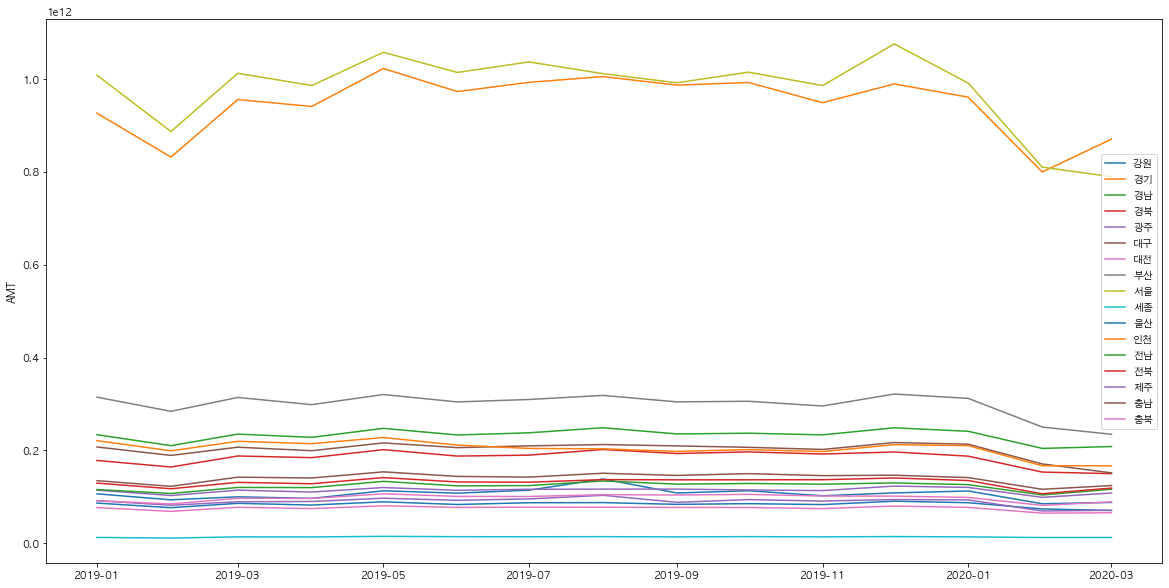

In [44]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
sido = sum_sido["CARD_SIDO_NM"].unique()
reg = sum_sido["REG_YYMM"].unique()
# Add x-axis and y-axis
for si in sido:
    sns.lineplot(x=reg, y="AMT", data=sum.loc[sum_sido["CARD_SIDO_NM"] == si, ["REG_YYMM", "AMT"]], label = si)


In [45]:
sum_std = pd.DataFrame(train["AMT"].groupby([train["REG_YYMM"], train["STD_CLSS_NM"]]).sum()).reset_index()
sum_std

,REG_YYMM,STD_CLSS_NM,AMT
0,2019-01-01,건강보조식품 소매업,8605074944
1,2019-01-01,골프장 운영업,11968748603
2,2019-01-01,과실 및 채소 소매업,44453112689
3,2019-01-01,관광 민예품 및 선물용품 소매업,955750428
4,2019-01-01,그외 기타 분류안된 오락관련 서비스업,1017500
...,...,...,...
610,2020-03-01,피자 햄버거 샌드위치 및 유사 음식점업,65972238656
611,2020-03-01,한식 음식점업,666573459086
612,2020-03-01,호텔업,5073633041
613,2020-03-01,화장품 및 방향제 소매업,31002789304


['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 분류안된 오락관련 서비스업' '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업'
 '기타 수상오락 서비스업' '기타 외국식 음식점업' '기타 주점업' '기타음식료품위주종합소매업' '내항 여객 운송업' '마사지업'
 '면세점' '버스 운송업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업' '슈퍼마켓'
 '스포츠 및 레크레이션 용품 임대업' '여관업' '여행사업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '자동차 임대업' '전시 및 행사 대행업' '정기 항공 운송업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업'
 '체인화 편의점' '택시 운송업' '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업'
 '화장품 및 방향제 소매업' '휴양콘도 운영업']


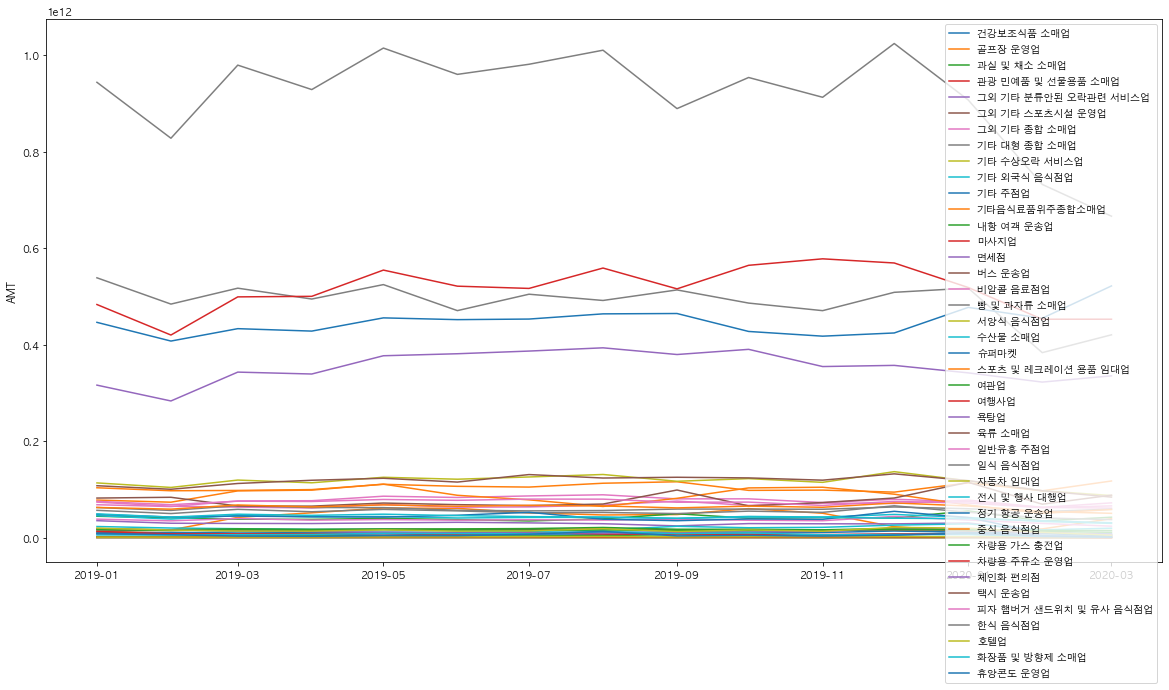

In [72]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
# ax.set(ylim = (0, 150000000000))
std = sum_std["STD_CLSS_NM"].unique()
print(std)
reg = sum_std["REG_YYMM"].unique()
# Add x-axis and y-axis
for st in std:
    sns.lineplot(x=reg, y="AMT", data=sum_std.loc[sum_std["STD_CLSS_NM"] == st, ["REG_YYMM", "AMT"]], label = st)